# MNIST Classification 
In this notebook, I trained a softmax regression model (neural network architecture without hidden layer): 784 nodes in input layer and 10 nodes in the output layer to classify handwritten digits in MNIST dataset.

MNIST Dataset Description:

MNIST consists of images of handwritten digits and annotated labels. It has 55,000 training examples, 10,000 test examples, and 5,000 validation examples. Each image is [28x28] which are futher flattened into 784-dimentional vector.

### Import required libraries

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Reading input data
We will use one-hot encoded dataset. Since each image has 10 possible outcome (digits between 0 & 9); y label is a 10-dimentional vector with 1 at the position of actual value and 0 elsewhere. For example, for '5' label, one-hot encoded y vector would be [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. In tensorflow, we use placeholder to allocate a variable without specifying its value. We use a matrix of size [None, 784] for input set (x). 784, because each image is a 784-dimentional vector and for None we can use any batch size of training examples when we run the tensorflow session. 

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Defining learning parameters
We need to define weight matrix and bias vector. In tensorflow, we use Variable to allocate parameters, whose values can be modified and it keeps on updating during the course of training. Intially, we start as 0 values, later these will learn correct values when trained. weight matrix is of size [784, 10] as we have 784 nodes in the input layer and 10 nodes in the output layer and bias is of size [10], one for each node in the output layer.

In [3]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

### Defining model
As common in case of multinomial logistic regression setting, we will use softmax to predict final probabilities for each class label. Softmax is a function that takes an exponential of input and then normalizes across all outcomes, making sure final values are between 0 and 1 and all sum to 1. Thereby, we will get 10 probability values, corresponding to each label.

In [4]:
y = tf.nn.softmax(tf.matmul(x, w) + b)

### Loss Function
We will use cross entropy loss function to evaluate the performance of the model. Cross Entropy is a good measure of the distance between two vectors. Our predicted outcome is 10-dimentional vector and actual y is also a 10-dimentional one-hot encoded vector. To calculate cross entropy, we multiply the actual with the natural log of predicted (element-wise vector-vector multiplication), sum across all labels, take the negative, and average across all training examples in the batch.

In [5]:
y_actual = tf.placeholder(tf.float32, [None, 10])
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_actual * tf.log(y), axis=1))

### Learning: Loss Optimization
We will use Gradient Descent approach with a learning rate of 0.5 to minimize the loss and learn set of parameters corresponding to it.

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
model = optimizer.minimize(cross_entropy_loss)

### Run session and train model
Now, we have completely defined our model setting, we will run tensorflow session to train the model and make predictions. We now need to specify values corresponding to placeholders we defined above. Using feed_dict parameter, we can specify that. Just for the sake of simplicity here, we will train the model for only 500 iterations and taking a batch of size 1000 everytime.

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
errors = []
for i in range(500):
    batch_x, batch_y = mnist.train.next_batch(1000)
    sess.run(model, feed_dict={x: batch_x, y_actual: batch_y})
    errors.append(sess.run(cross_entropy_loss, feed_dict={x: batch_x, y_actual: batch_y}))
    print("iteration: ", i, " Loss: ", sess.run(cross_entropy_loss, feed_dict={x: batch_x, y_actual: batch_y}))    

iteration:  0  Loss:  2.183364
iteration:  1  Loss:  2.081171
iteration:  2  Loss:  2.016308
iteration:  3  Loss:  1.931015
iteration:  4  Loss:  1.850808
iteration:  5  Loss:  1.7679944
iteration:  6  Loss:  1.7209607
iteration:  7  Loss:  1.6343228
iteration:  8  Loss:  1.5930687
iteration:  9  Loss:  1.5102416
iteration:  10  Loss:  1.4937283
iteration:  11  Loss:  1.4532962
iteration:  12  Loss:  1.3994123
iteration:  13  Loss:  1.381015
iteration:  14  Loss:  1.3230395
iteration:  15  Loss:  1.2845683
iteration:  16  Loss:  1.2833518
iteration:  17  Loss:  1.2767429
iteration:  18  Loss:  1.2255551
iteration:  19  Loss:  1.1657428
iteration:  20  Loss:  1.1628716
iteration:  21  Loss:  1.11568
iteration:  22  Loss:  1.1384082
iteration:  23  Loss:  1.0718672
iteration:  24  Loss:  1.0994749
iteration:  25  Loss:  1.0549387
iteration:  26  Loss:  1.0426573
iteration:  27  Loss:  1.0053368
iteration:  28  Loss:  1.0017208
iteration:  29  Loss:  1.0104046
iteration:  30  Loss:  0.971

iteration:  251  Loss:  0.46902642
iteration:  252  Loss:  0.432154
iteration:  253  Loss:  0.49073914
iteration:  254  Loss:  0.48873162
iteration:  255  Loss:  0.4345097
iteration:  256  Loss:  0.44595507
iteration:  257  Loss:  0.45872685
iteration:  258  Loss:  0.42891607
iteration:  259  Loss:  0.44534177
iteration:  260  Loss:  0.43112436
iteration:  261  Loss:  0.44103515
iteration:  262  Loss:  0.46746767
iteration:  263  Loss:  0.44272473
iteration:  264  Loss:  0.4285523
iteration:  265  Loss:  0.43601146
iteration:  266  Loss:  0.41746578
iteration:  267  Loss:  0.4604862
iteration:  268  Loss:  0.47303504
iteration:  269  Loss:  0.44993994
iteration:  270  Loss:  0.4607221
iteration:  271  Loss:  0.46435022
iteration:  272  Loss:  0.41699678
iteration:  273  Loss:  0.48980305
iteration:  274  Loss:  0.4519217
iteration:  275  Loss:  0.46271434
iteration:  276  Loss:  0.4212836
iteration:  277  Loss:  0.47280648
iteration:  278  Loss:  0.46121904
iteration:  279  Loss:  0.43

iteration:  495  Loss:  0.3803368
iteration:  496  Loss:  0.38489747
iteration:  497  Loss:  0.40388283
iteration:  498  Loss:  0.40488452
iteration:  499  Loss:  0.40171555


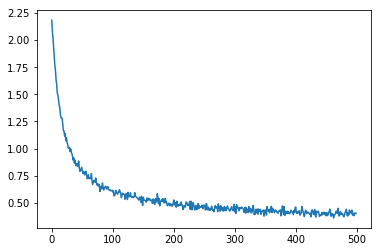

In [8]:
plt.plot(range(500), errors)

### Model evaluation
We can compare labels corresponding to maximum probability in the predicted vector to the max in the actual y vector. argmax method with axis = 1 (row-wise) can be handy here.

In [9]:
corr_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_actual, 1))
accuracy = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
print("Overall Accuracy over test set: ", sess.run(accuracy, feed_dict={x: mnist.test.images, y_actual: mnist.test.labels}))

Overall Accuracy over test set:  0.9014
